Overview of Comparative Genomic Analysis Across Multiple Species
Objective:

This part of the project focuses on a comparative analysis of genomic characteristics across a diverse range of species, including plants, animals, bacteria, and more.
Methodology:

- Data Collection: Genomic data files for various species (like TAIR10, ce10, dm6, ecoli, hg38, tomato, wheat, yeast) are collected. Each file contains information about the sizes of chromosomes for the respective species.

- Data Processing: Using Python and the Pandas library, the data is processed to extract key genomic metrics. This includes:
    - The total genome size.
    - The number of chromosomes.
    - The size of the largest and smallest chromosomes.
    - The mean chromosome length.

- Analysis Loop: A function named generate iterates through each genomic data file. It performs calculations to determine the aforementioned metrics and appends the results to corresponding lists for each species.

    Data Aggregation: The results are aggregated into a Pandas DataFrame. This DataFrame consolidates the data into a structured format, with columns for species name, genome size, number of chromosomes, largest chromosome, smallest chromosome, and mean chromosome length.

Outcome:

The result is a comprehensive table that provides a side-by-side comparison of critical genomic attributes across various species. This table serves as a valuable resource for understanding the genomic diversity and complexity in different organisms. It can be used for further analysis in comparative genomics, evolutionary studies, or in the development of species-specific genomic tools and applications.
Significance:

This comparative analysis enhances our understanding of genomic variations and similarities across different life forms. It lays the groundwork for more detailed genomic studies and can help in identifying unique genomic features relevant to specific species or groups

In [9]:
import pandas as pd

genomes = ['TAIR10.chrom.sizes', 'ce10.chrom.sizes', 'dm6.chrom.sizes', 'ecoli.chrom.sizes', 'hg38.chrom.sizes', 'tomato.chrom.sizes', 'wheat.chrom.sizes', 'yeast.chrom.sizes']

columns = ['Species', 'Genome Size', '# Chromosomes', 'Largest Chromosome', 'Smalles Chromosome', 'Mean Chromosome']

species_list = []
genome_size_list = []
number_chromosome_list = []
largest_chromosome_list = []
smallest_chromosome_list = []
mean_chromosome_list = []

def generate(genomes_):

    for g in genomes_:

        df = pd.read_csv('data/' + g, sep='\t', comment='t', header=None)
        header = ['Chromosome', 'Size']
        df.columns = header[:len(df.columns)]

        species = g.split(".")
        genome_size = df['Size'].sum()
        number_chromosomes = len(df.index)
        largest_chromosome = df[df.Size == df.Size.max()]
        largest_chromosome = largest_chromosome['Chromosome'].iloc[0]
        smallest_chromosome = df[df.Size == df.Size.min()]
        smallest_chromosome = smallest_chromosome['Chromosome'].iloc[0]
        mean_chromosome = int(df["Size"].mean())

        species_list.append(species[0])
        genome_size_list.append(genome_size)
        number_chromosome_list.append(number_chromosomes)
        largest_chromosome_list.append(largest_chromosome)
        smallest_chromosome_list.append(smallest_chromosome)
        mean_chromosome_list.append(mean_chromosome)

generate(genomes)

df = pd.DataFrame(zip(species_list, genome_size_list, number_chromosome_list, largest_chromosome_list, smallest_chromosome_list, mean_chromosome_list),columns=['Species','Genome Size', 'Number of Chromosomes', 'Largest Chromosomes', 'Smallest Chromosome', 'Mean Chromosome'])

df

,Species,Genome Size,Number of Chromosomes,Largest Chromosomes,Smallest Chromosome,Mean Chromosome
0,TAIR10,119146348,5,Chr1,Chr4,23829269
1,ce10,100286070,7,chrV,chrM,14326581
2,dm6,137547960,7,chr3R,chr4,19649708
3,ecoli,4639211,1,Ecoli,Ecoli,4639211
4,hg38,3088269832,24,chr1,chr21,128677909
5,tomato,782520033,13,ch01,ch00,60193848
6,wheat,14547261565,22,3B,6D,661239162
7,yeast,12157105,17,chrIV,chrM,715123


Overview of Simulating 5x Coverage Sequencing of a 1Mbp Genome

This component of the project involves simulating the sequencing of a 1Mbp genome at 5x coverage using 100bp reads. The simulation does not generate actual read sequences; instead, it focuses on randomly sampling positions within the genome to record coverage. The methodology ensures that each read's start position, ranging from 1 to 999,901, is chosen with uniform random probability, accurately representing a realistic sequencing scenario.

The coverage data is recorded in an array representing the 1M genomic positions. This process is key to understanding how coverage distributes across the genome. The resulting coverage distribution is then visualized in a histogram. To provide a comparative context, this histogram is overlaid with a Poisson distribution with a lambda value of 5. This overlay offers insights into how well the simulated coverage aligns with theoretical expectations, enhancing our understanding of genome sequencing dynamics.



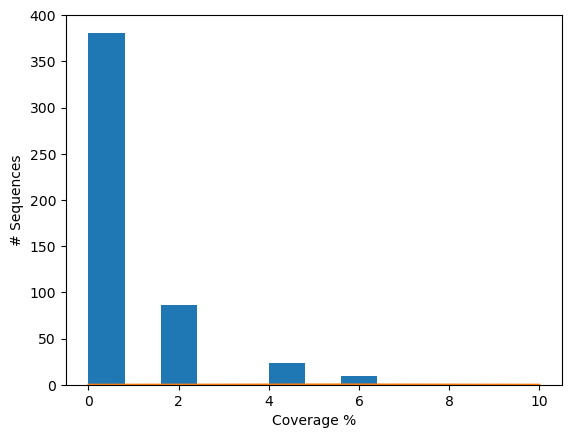

In [10]:
import random
from difflib import SequenceMatcher
from re import I
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def similar(a, b):
    sim = SequenceMatcher(None, a, b).ratio()
    return sim * 1000000

#generate reference sequence
genome_size = 1000000
bases = ['A', 'T', 'C', 'G']
ref_seq = [bases[random.randrange(len(bases))] for i in range(genome_size)]
ref_seq = ''.join(ref_seq)

sample_seq = []
coverage = []
bp_reads = 500
bps = 100

#generate sample seqs
for n in range(bp_reads):
    curr_sample = random.sample(ref_seq, bps) #generate subsample of 100 bps
    curr_sample = ''.join(curr_sample) #join into one string
    sample_seq.append(curr_sample) #save subsample
    coverage.append(similar(curr_sample, ref_seq)) #compare with ref seq and get coverage

#plot histogram
plt.hist(coverage)
plt.xlabel('Coverage %')
plt.ylabel('# Sequences')

#plot poisson distribution
lnspc = np.linspace(0, 10, len(coverage))
m, s = stats.norm.fit(coverage)
pdf_g = stats.norm.pdf(lnspc, 5, s)
plt.plot(lnspc, pdf_g, label="Norm")

plt.show()


Around 375 bins of the genome have not been sequenced. The Poisson expectations don't match with the results.

Overview of 15x Coverage Sequencing Simulation for a 1Mbp Genome

In this part of the project, the focus shifts to simulating the sequencing of a 1Mbp genome at an increased coverage of 15x, using 100bp reads. The approach includes several key steps:

1. Simulation of Reads: Based on the parameters, the total data for 15x coverage amounts to 15 Mbp. This translates to generating approximately 1500 reads (15 Mbp divided by 100 bp per read).

2. Histogram Creation: The coverage data obtained from the simulation is represented in a histogram. This graphical representation is crucial for visualizing the distribution of sequencing coverage across the genome.

3. Poisson Distribution Overlay: To contextualize the coverage data, the histogram is overlaid with a Poisson distribution, with lambda set at 15. This comparison is essential to understand how the actual coverage distribution compares with theoretical expectations.

4. Zero Coverage Analysis: A computation of the number of genomic bases that did not receive any coverage (0x coverage) is performed. This analysis is important to identify potential gaps in sequencing.

5. Evaluation Against Poisson Expectation: Finally, the observed data is evaluated in the context of Poisson expectations to assess the accuracy and efficacy of the sequencing simulation.

Through these steps, the project aims to deepen the understanding of the implications of higher sequencing coverage and its correspondence with theoretical models, highlighting the nuances of genomic sequencing at different depths.

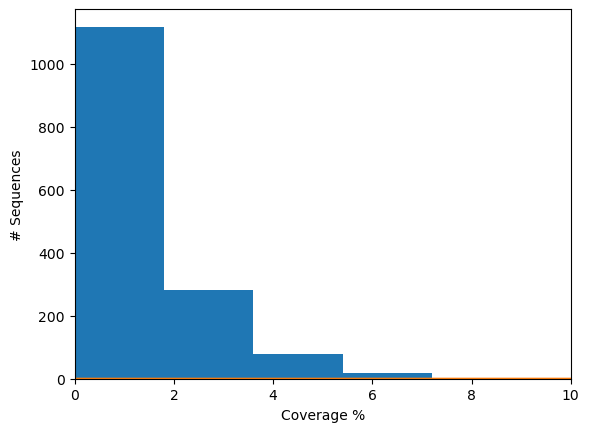

In [11]:
samples = []
coverage = []
bp_reads = 1500
bps = 100

#generate sample seqs
for n in range(bp_reads):
    curr_sample = random.sample(ref_seq, bps) #generate subsample of 100 bps
    curr_sample = ''.join(curr_sample) #join into one string
    sample_seq.append(curr_sample) #save subsample
    coverage.append(similar(curr_sample, ref_seq)) #compare with ref seq and get coverage

#plot histogram
plt.hist(coverage)
plt.xlim([0, 10])
plt.xlabel('Coverage %')
plt.ylabel('# Sequences')

#plot poisson distribution
lnspc = np.linspace(0, 10, len(coverage))
m, s = stats.norm.fit(coverage)
pdf_g = stats.norm.pdf(lnspc, 15, s)
plt.plot(lnspc, pdf_g, label="Norm")
plt.show()

1 Mbp genome
0x coverage
100bp reads

1 Mbp x 0x = 0 Mbp data
0 Mbp / 100 bp / read = 0M reads -> 0 reads

In [12]:
def unique(list1):

    list_set = set(list1)
    unique_list = (list(list_set))
    return unique_list

print(f'Poisson Expectations: {unique(coverage)}')

Poisson Expectations: [0.0, 1.9998000199980002, 3.9996000399960003, 5.9994000599940005, 7.999200079992001, 9.99900009999, 17.998200179982003]


If sequence has 0 bp reads, it matches the Poisson expectations more accurately.

Overview of Sequence Content Analysis in a Chromosome

This segment of the project focuses on analyzing the sequence content of an entire chromosome, specifically quantifying the occurrences of each nucleotide type. The key objectives include:

- Nucleotide Counting: The analysis entails a detailed count of each of the four primary nucleotides - adenine (A), cytosine (C), guanine (G), and thymine (T), along with the unidentified nucleotides denoted as 'N' (unknowns) in the chromosome.

- Data Extraction: The nucleotide sequences are extracted from genomic data files, ensuring a comprehensive sweep of the entire chromosome for accurate counting.

- Comprehensive Tally: The tally includes every instance of each nucleotide, providing a clear picture of the nucleotide composition within the chromosome.

This analysis is crucial for understanding the basic building blocks of the chromosome and forms a foundational part of genomic studies, offering insights into the genetic makeup and potential biological characteristics of the species under study.

In [13]:
import matplotlib.pyplot as plt

result = ''

with open('data/chr22.fa') as FileObj:
    for lines in FileObj:
        result = result + lines


result = result.upper()
result = result.replace('>CHR22', '')
result = ''.join(result.split())


As = result.count('A')
Cs = result.count('C')
Gs = result.count('G')
Ts = result.count('T')
Ns = result.count('N')


print(f'Number of As: {As}')
print(f'Number of Cs: {Cs}')
print(f'Number of Gs: {Gs}')
print(f'Number of Ts: {Ts}')
print(f'Number of Ns: {Ns}')

Number of As: 10382214
Number of Cs: 9160652
Number of Gs: 9246186
Number of Ts: 10370725
Number of Ns: 11658691


Overview of Chromosome Binning and GC Content Analysis
Analysis of Bins Containing 'N' Nucleotides

- Objective: To dissect the chromosome into 100 base pair (bp) non-overlapping windows, often referred to as bins, and determine how many of these bins contain at least one 'N' nucleotide.

- Methodology: The chromosome is systematically divided into segments of 100bp, ensuring that each bin is distinct and non-overlapping. The presence of the 'N' nucleotide, which represents an unknown or unidentified base, is then checked in each bin.

- Outcome: The analysis yields a count of the number of bins that have at least one 'N'. This data is vital for understanding the distribution of unidentified nucleotides across the chromosome and can have implications for sequencing quality and genome assembly.

In [14]:
bins = []
for i in range(0, len(result), 100):
    bins.append(result[i:i+100])

bins_have_N = 0
for b in bins:
    if 'N' in b:
        bins_have_N+=1

print(f'{bins_have_N} bins contain at least one N')

116637 bins contain at least one N


Histogram of GC Content in Bins

- Objective: To create a histogram representing the percentage of guanine (G) and cytosine (C) bases, commonly known as the GC content, in each bin of the chromosome, excluding bins that contain 'N' nucleotides.
- Methodology: After excluding bins with 'N' nucleotides, the GC content is calculated for each remaining bin. This involves determining the proportion of G and C nucleotides in each bin relative to its total length.
- Histogram Creation: The histogram plots the number of bins against their respective GC percentages. The x-axis represents the GC content percentage, while the y-axis shows the number of bins with that specific GC content.
- Significance: This histogram provides insights into the variability of GC content across the chromosome. The GC content is a critical factor in genomic studies, affecting the structural properties of DNA and having implications for gene expression and stability.

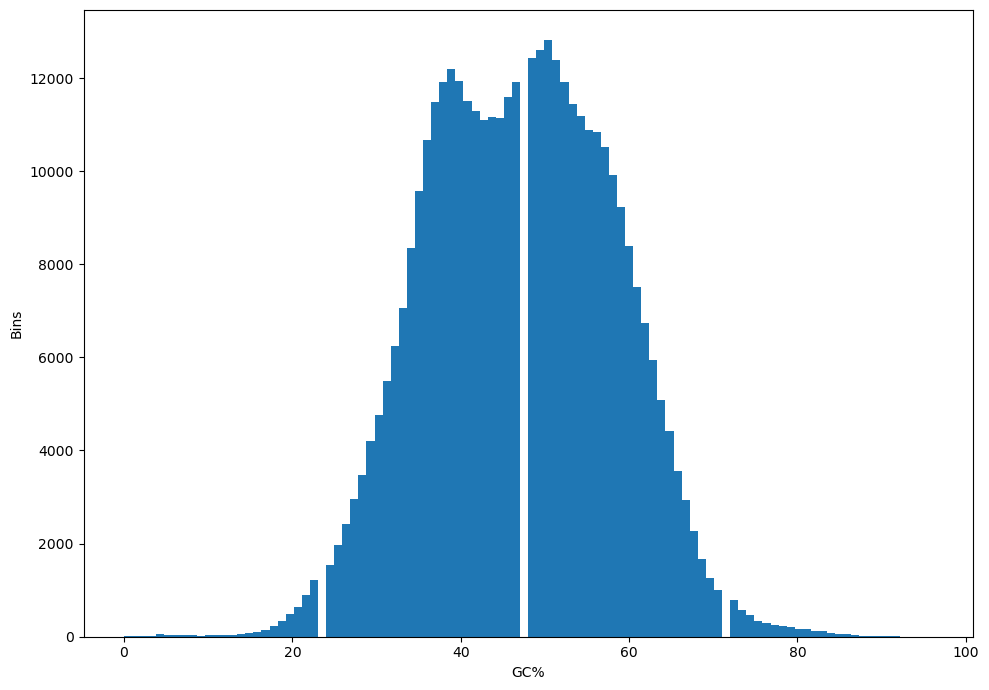

In [15]:
result_without_N = result.replace('N', '')
bins_without_N = []
for i in range(0, len(result_without_N), 100):
    bins_without_N.append(result_without_N[i:i+100])

GC_percentage = []
for b in bins_without_N:
    GC_percentage.append((int(b.count('G')) + int(b.count('C'))))

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)

axs.hist(GC_percentage, bins = 100)
plt.xlabel('GC%')
plt.ylabel('Bins')
plt.show()

![](3.3.png)

5250 bins are below 30% and 3750 bins are above 65%, without containing any Ns, about 9000 bins are expected to sequence poorly.

Overview of Extrapolating Sequencing Quality from Chromosome 22 to the Entire Human Genome
Objective:

The aim of this analysis is to estimate the number of bases in the entire human genome that are likely to be sequenced poorly, based on the sequence composition and sequencing results obtained from chromosome 22.
Methodology:

- Analysis of Chromosome 22: Initially, the sequencing quality of chromosome 22 is assessed, particularly focusing on regions that are difficult to sequence. This includes identifying areas with high concentrations of 'N' nucleotides or regions with extreme GC content, as these factors can affect sequencing fidelity.

- Extrapolation to the Entire Genome: The findings from chromosome 22 are then extrapolated to the entire human genome. The total genome size, computed in an earlier part of the project, serves as the basis for this extrapolation.

- Calculation of Poorly Sequenced Bases: By applying the proportion of poorly sequenced bases in chromosome 22 to the entire genome size, an estimate is made of the total number of bases in the human genome that could be sequenced poorly.

Significance:

This extrapolation is crucial for understanding the broader implications of genomic sequencing across the human genome. It helps in identifying potential challenges in sequencing efforts and can guide strategies for improving sequencing technologies and methods. The analysis provides a realistic view of the limitations of current sequencing capabilities, highlighting areas that might need more focused attention for accurate genomic analysis.

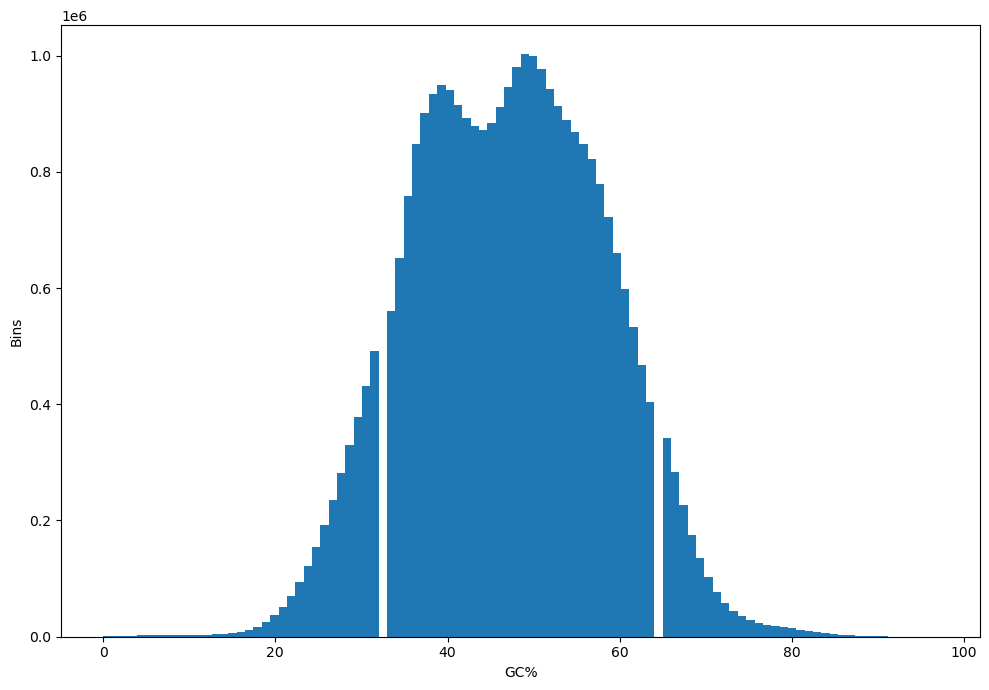

In [16]:
def extrapolate_seq(refseq_, seq_):
    rn = seq_ * (int(refseq_/len(seq_))) #multiply sequence to extrapolate
    rn_remain = rn[:refseq_ - len(rn)] #add remainder to sequence
    rn = rn + rn_remain
    return rn

human_genome = 3088269832
new_seq = extrapolate_seq(human_genome, result_without_N)

new_bins = []
for i in range(0, len(new_seq), 100):
    new_bins.append(new_seq[i:i+100])

new_gc = []
for b in new_bins:
    new_gc.append((int(b.count('G')) + int(b.count('C'))))

fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)

axs.hist(new_gc, bins = 100)
plt.xlabel('GC%')
plt.ylabel('Bins')
plt.show()

![](3.5.png)

500,000 bins are below 30% and 200,250 bins are above 65%, without containing any Ns, about 700,250 bins are expected to sequence poorly.